In [1]:
import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F


%load_ext autoreload
%autoreload 2

In [29]:
# Generate 2D gaussians in a circle
class gauss_circle(object):
    def __init__(self):
        self.num_circles = 8
        self.std = 0.02
        
        radius = 2
        delta = 2 * np.pi / self.num_circles

        centers_x = np.asarray([radius*np.cos(i * delta) for i in range(self.num_circles)])
        centers_y = np.asarray([radius*np.sin(i * delta) for i in range(self.num_circles)])

        self.p = [1./self.num_circles for _ in range(self.num_circles)]
        self.centers = np.concatenate((centers_x[:, np.newaxis], centers_y[:, np.newaxis]), 1)
        
    def sample(self, n_samples):
        centers_idx = np.random.choice(self.num_circles, n_samples, p=self.p)
        print(self.centers.shape)
        centers_sample = self.centers[centers_idx, :]
        data_sample = np.random.normal(loc=centers_sample, scale=self.std)
        return data_sample.astype('float32')

    
    


(8, 2)


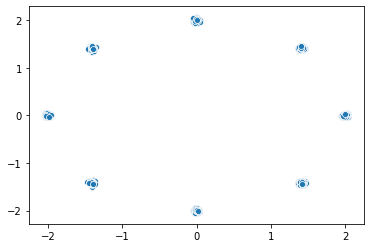

In [37]:
dist = gauss_circle()
data = dist.sample(1000)
_ = sns.scatterplot(data[:, 0], data[:, 1])

In [ ]:
# Network definitions
